# SaaSquatch Videos: Answering Specific Questions

#### In this notebook, I will use a merged dataframe (created in the last notebook) to answer questions about my chosen topic: "User Engagement Factors for Dare Network"

### 1. Import Libraries and Prepare Data
### 2. 

In [59]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy
from scipy import stats
import matplotlib

In [60]:
#Set Path
path = r'/Users/tristansavella/Project_B2CSAAS'

In [61]:
df = pd.read_csv(os.path.join(path, 'data', 'combined_videos_trials.csv'), index_col = False)

In [62]:
df.head()

,email_key,interaction_date,video_brand,video_type,genre,watched_videos,has_converted,trial_brand,month_trial_end,month_interaction
0,6a602ec029c1f56c720043c565fc4a3c,2023-12-02,playground prime,tv,comedy,4,False,playground prime,2023-12,2023-12
1,6a602ec029c1f56c720043c565fc4a3c,2023-12-02,playground prime,tv,documentary,1,False,playground prime,2023-12,2023-12
2,6a602ec029c1f56c720043c565fc4a3c,2023-12-02,playground prime,tv,family/kids,5,False,playground prime,2023-12,2023-12
3,6a602ec029c1f56c720043c565fc4a3c,2023-12-02,playground prime,tv,scifi,5,False,playground prime,2023-12,2023-12
4,6a602ec029c1f56c720043c565fc4a3c,2024-01-20,playground prime,tv,comedy,1,False,playground prime,2023-12,2024-01


In [63]:
df.shape

(206338, 10)

In [64]:
# Grouping the dataset by 'email_key' and 'trial_brand', summing the 'watched_videos' column
aggregated_df = df.groupby(['email_key', 'trial_brand','has_converted'], as_index=False)['watched_videos'].sum()

# Renaming the column to 'total_videos_watched' for clarity
aggregated_df.rename(columns={'watched_videos': 'total_videos_watched'}, inplace=True)

In [65]:
aggregated_df.head()

,email_key,trial_brand,has_converted,total_videos_watched
0,0001a7e7f27f087684ca6d660266e93e,playground prime,True,5
1,00029f800f7be37d4cb8cb625f357bb3,mosaic,False,5
2,0006ae6456717beae51887cee5dcc273,dare network,True,5
3,0007ad547773d7fc1fc9e8c6817275ef,dare network,True,17
4,0007afe622a794c3e1e2112167566907,playground prime,True,2


In [66]:
aggregated_df.shape

(26372, 4)

### Create Four Subsets

In [68]:
# 1. All converted users (all brands)
converted_users = aggregated_df[aggregated_df['has_converted'] == True]

# 2. All non-converted users (all brands)
non_converted_users = aggregated_df[aggregated_df['has_converted'] == False]

# 3. Converted users in Dare Network
converted_dare_users = aggregated_df[(aggregated_df['has_converted'] == True) & (aggregated_df['trial_brand'] == 'dare network')]

# 4. Non-converted users in Dare Network
non_converted_dare_users = aggregated_df[(aggregated_df['has_converted'] == False) & (aggregated_df['trial_brand'] == 'dare network')]

### Checking All Subsets

In [70]:
converted_users.head()

,email_key,trial_brand,has_converted,total_videos_watched
0,0001a7e7f27f087684ca6d660266e93e,playground prime,True,5
2,0006ae6456717beae51887cee5dcc273,dare network,True,5
3,0007ad547773d7fc1fc9e8c6817275ef,dare network,True,17
4,0007afe622a794c3e1e2112167566907,playground prime,True,2
5,000ca09695229a61fad8e27766f81743,mosaic,True,1


In [71]:
converted_users.describe()

,total_videos_watched
count,20137.000000
mean,13.745742
std,26.508365
min,1.000000
25%,2.000000
50%,6.000000
75%,14.000000
max,604.000000


In [72]:
non_converted_users.head()

,email_key,trial_brand,has_converted,total_videos_watched
1,00029f800f7be37d4cb8cb625f357bb3,mosaic,False,5
7,000e3872566a22b9d19aa10f4c4bb11f,dare network,False,3
13,0017aa9849bb44ff8b3e86ed618d3b60,dare network,False,7
17,0024fcc7e53d3d8cf676862e0956e4f1,dare network,False,7
35,004c4e319394c574ddb5da9c1a92b076,dare network,False,2


In [73]:
non_converted_users.describe()

,total_videos_watched
count,6235.000000
mean,7.465597
std,16.141435
min,1.000000
25%,2.000000
50%,3.000000
75%,7.000000
max,440.000000


In [74]:
converted_dare_users.head()

,email_key,trial_brand,has_converted,total_videos_watched
2,0006ae6456717beae51887cee5dcc273,dare network,True,5
3,0007ad547773d7fc1fc9e8c6817275ef,dare network,True,17
6,000d53c4a7320daa4546688f7bccad72,dare network,True,7
8,0015c6641fb86250d95cbd8aeb93fe47,dare network,True,7
9,0016743456d6c1cb9a27df2c45f8b566,dare network,True,7


In [75]:
converted_dare_users.describe()

,total_videos_watched
count,11992.000000
mean,16.259590
std,30.250737
min,1.000000
25%,3.000000
50%,7.000000
75%,17.000000
max,604.000000


In [76]:
non_converted_dare_users.head()

,email_key,trial_brand,has_converted,total_videos_watched
7,000e3872566a22b9d19aa10f4c4bb11f,dare network,False,3
13,0017aa9849bb44ff8b3e86ed618d3b60,dare network,False,7
17,0024fcc7e53d3d8cf676862e0956e4f1,dare network,False,7
35,004c4e319394c574ddb5da9c1a92b076,dare network,False,2
42,005830ae974108932a1fafa5bee7d3bb,dare network,False,21


In [77]:
non_converted_dare_users.describe()

,total_videos_watched
count,3254.000000
mean,8.766749
std,18.600397
min,1.000000
25%,2.000000
50%,4.000000
75%,8.000000
max,308.000000


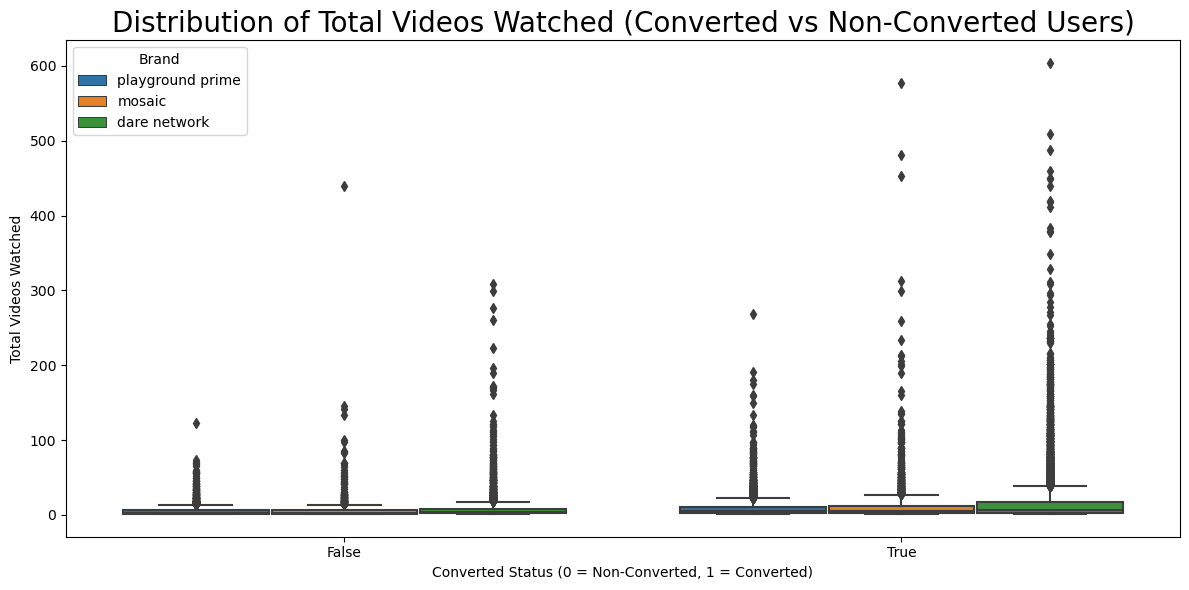

In [78]:
# Boxplot for general users (all brands)
plt.figure(figsize=(12, 6))
sns.boxplot(data=aggregated_df, x='has_converted', y='total_videos_watched', hue='trial_brand')
plt.title('Distribution of Total Videos Watched (Converted vs Non-Converted Users)', fontsize=20)
plt.xlabel('Converted Status (0 = Non-Converted, 1 = Converted)')
plt.ylabel('Total Videos Watched')
plt.legend(title='Brand')

# Save the plot to the 'visualizations' subfolder
plt.tight_layout()
plt.savefig('visualizations/box_plot_all.png')
plt.show()

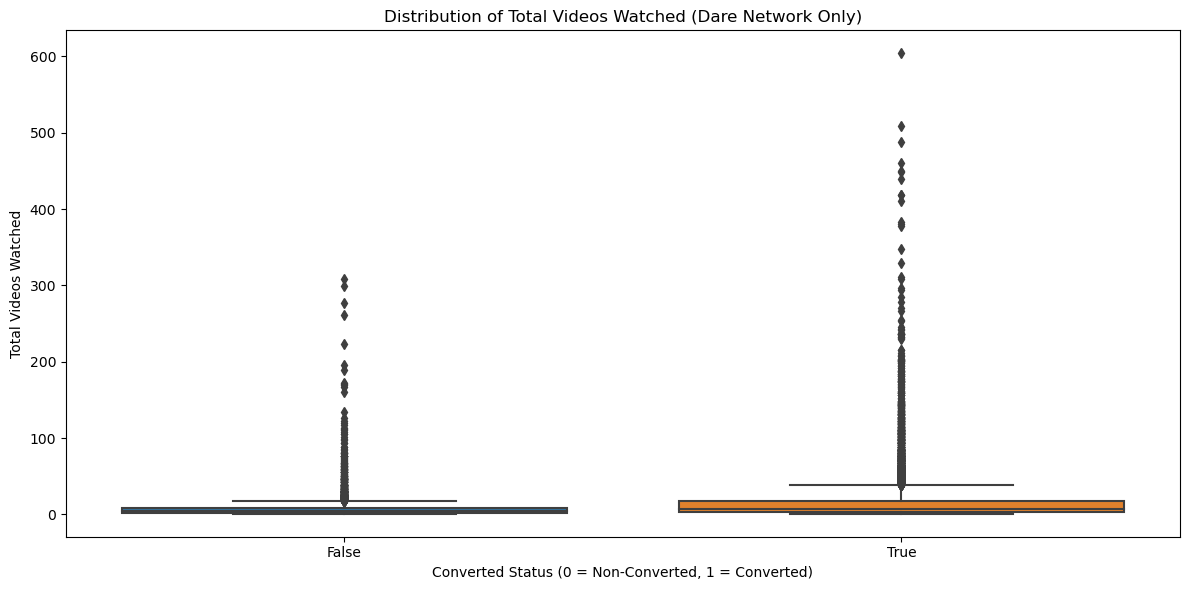

In [79]:
# Boxplot for Dare Network only
plt.figure(figsize=(12, 6))
sns.boxplot(data=aggregated_df[aggregated_df['trial_brand'] == 'dare network'], x='has_converted', y='total_videos_watched')
plt.title('Distribution of Total Videos Watched (Dare Network Only)')
plt.xlabel('Converted Status (0 = Non-Converted, 1 = Converted)')
plt.ylabel('Total Videos Watched')

# Save the plot to the 'visualizations' subfolder
plt.tight_layout()
plt.savefig('visualizations/box_plot_dare.png')
plt.show()

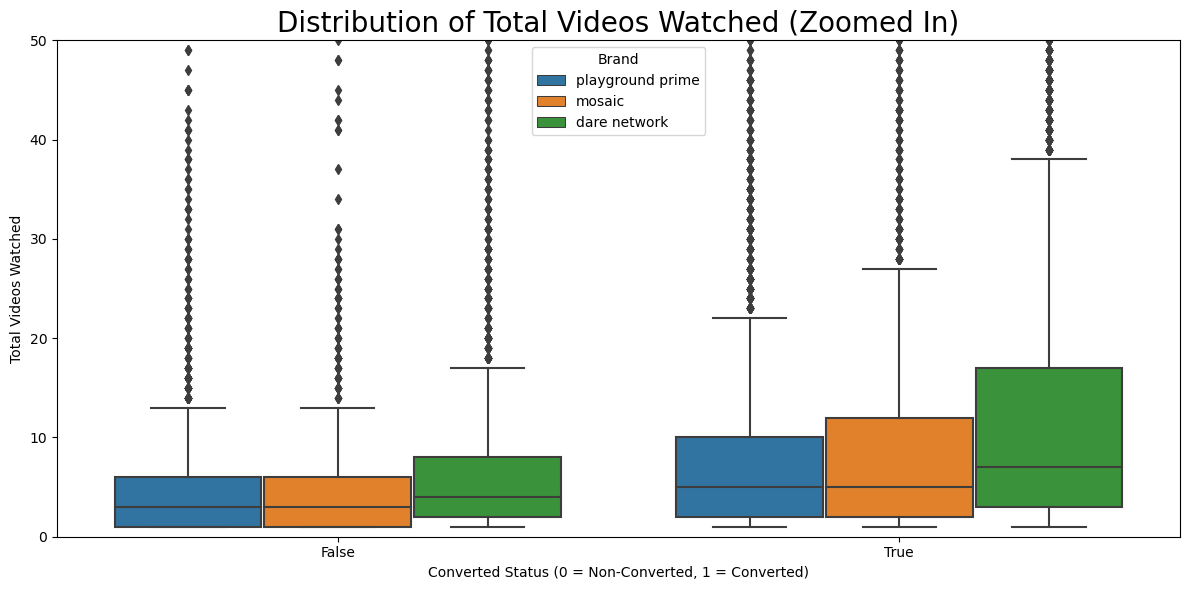

In [80]:
# Boxplot for general users (all brands) with adjusted y-axis
plt.figure(figsize=(12, 6))
sns.boxplot(data=aggregated_df, x='has_converted', y='total_videos_watched', hue='trial_brand')
plt.ylim(0, 50)  # Adjust the upper limit based on your data for better clarity
plt.title('Distribution of Total Videos Watched (Zoomed In)', fontsize=20)
plt.xlabel('Converted Status (0 = Non-Converted, 1 = Converted)')
plt.ylabel('Total Videos Watched')
plt.legend(title='Brand')

# Save the plot to the 'visualizations' subfolder
plt.tight_layout()
plt.savefig('visualizations/box_plot_all_adjust_outliers.png')
plt.show()

### T Testing by User Engagement (Number of Videos Watched)

In [82]:
# Perform the one-tailed t-test by calculating a two-tailed t-test first and adjusting the p-value
t_stat, p_value = stats.ttest_ind(
    converted_users['total_videos_watched'],
    non_converted_users['total_videos_watched'],
    equal_var=False  # Use Welch’s t-test for unequal variances
)

In [83]:
# Convert the p-value to a one-tailed p-value
one_tailed_p_value = p_value / 2

In [84]:
# Print the results
print(f"T-statistic: {t_stat}")
print(f"One-tailed P-value: {one_tailed_p_value}")

T-statistic: 22.678759335177933
One-tailed P-value: 1.5758364077082152e-112


In [85]:
# Interpret the one-tailed test result
if one_tailed_p_value < 0.05 and t_stat > 0:
    print("Reject the null hypothesis: Converted users watch significantly more videos than non-converted users.")
else:
    print("Fail to reject the null hypothesis: There is no significant evidence that converted users watch more videos.")

Reject the null hypothesis: Converted users watch significantly more videos than non-converted users.
